In [2]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost


import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('combined_data_with_attributes_jacc.csv')
df

,from,to,Y,Indegree,Outdegree,Jaccard_Coefficient
0,2882521.0,1549676.0,0,63,546,0.000000
1,4181492.0,3726352.0,0,36,937,0.000000
2,4441388.0,4160431.0,0,2,12,0.000000
3,1859854.0,2340683.0,0,3,104,0.000000
4,2245172.0,3032697.0,0,10,174,0.000000
...,...,...,...,...,...,...
199995,4600120.0,2515901.0,1,10,635,0.000000
199996,1118520.0,853040.0,1,19,1350,0.009053
199997,4576491.0,3498647.0,1,96,790,0.001261
199998,2186892.0,4472173.0,1,91,4010,0.019642


In [6]:
X = df[['from', 'to','Indegree','Outdegree','Jaccard_Coefficient']]
y = df['Y']

In [7]:
X

,from,to,Indegree,Outdegree,Jaccard_Coefficient
0,2882521.0,1549676.0,63,546,0.000000
1,4181492.0,3726352.0,36,937,0.000000
2,4441388.0,4160431.0,2,12,0.000000
3,1859854.0,2340683.0,3,104,0.000000
4,2245172.0,3032697.0,10,174,0.000000
...,...,...,...,...,...
199995,4600120.0,2515901.0,10,635,0.000000
199996,1118520.0,853040.0,19,1350,0.009053
199997,4576491.0,3498647.0,96,790,0.001261
199998,2186892.0,4472173.0,91,4010,0.019642


In [9]:
y

0         0
1         0
2         0
3         0
4         0
         ..
199995    1
199996    1
199997    1
199998    1
199999    1
Name: Y, Length: 200000, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (140000, 5)
X_test shape: (60000, 5)
y_train shape: (140000,)
y_test shape: (60000,)


Estimators =  10 Train Score 0.888356214135251 test Score 0.8889935414424112
Estimators =  50 Train Score 0.8911795407098122 test Score 0.8924868293010302
Estimators =  100 Train Score 0.8926332457624068 test Score 0.8935538733451163
Estimators =  250 Train Score 0.8926518631771009 test Score 0.8938295526676244
Estimators =  450 Train Score 0.8929861680844019 test Score 0.894337672728485


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

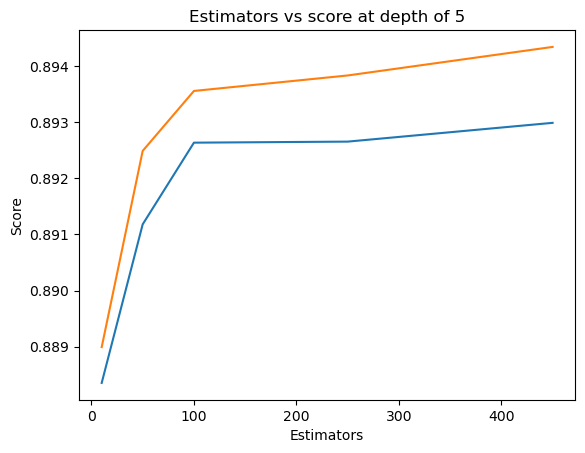

In [13]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(X_train,y_train)
    train_sc = f1_score(y_train,clf.predict(X_train))
    test_sc = f1_score(y_test,clf.predict(X_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8869234358735059 test Score 0.8886561606489793
depth =  9 Train Score 0.8954766754792759 test Score 0.895939256087771
depth =  11 Train Score 0.8970865069941208 test Score 0.896647670130741
depth =  15 Train Score 0.8980811098172244 test Score 0.8967803505952082
depth =  20 Train Score 0.8980616593469406 test Score 0.8966002344665884
depth =  35 Train Score 0.8980737375856258 test Score 0.8968139636168716
depth =  50 Train Score 0.8980737375856258 test Score 0.8968139636168716
depth =  70 Train Score 0.8980737375856258 test Score 0.8968139636168716
depth =  130 Train Score 0.8980737375856258 test Score 0.8968139636168716


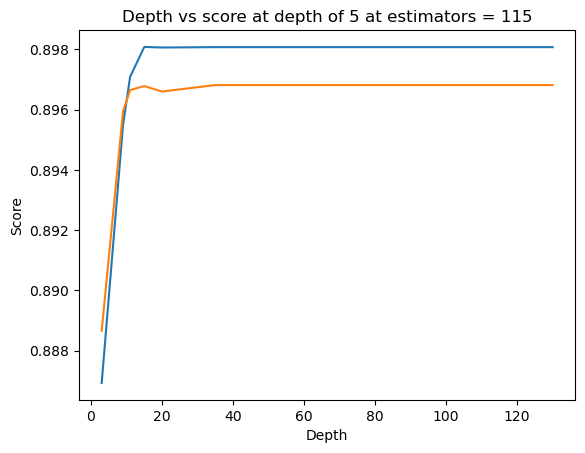

In [14]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(X_train,y_train)
    train_sc = f1_score(y_train,clf.predict(X_train))
    test_sc = f1_score(y_test,clf.predict(X_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [15]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(X_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.89470144 0.89474061 0.89418346 0.89458125 0.89482383]


KeyError: 'mean_train_score'

In [16]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=121, n_jobs=-1, random_state=25)


In [17]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [18]:
clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [19]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.8988816099026387
Test f1 score 0.8970612874040813


In [20]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.show()

Train confusion_matrix


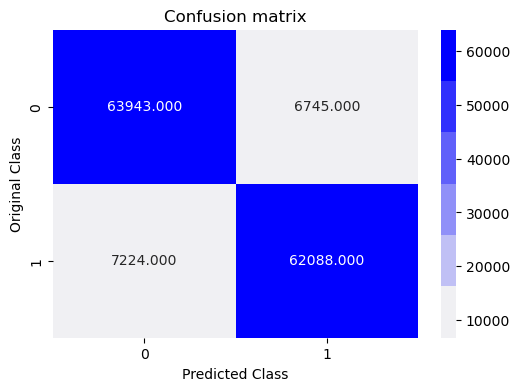

Test confusion_matrix


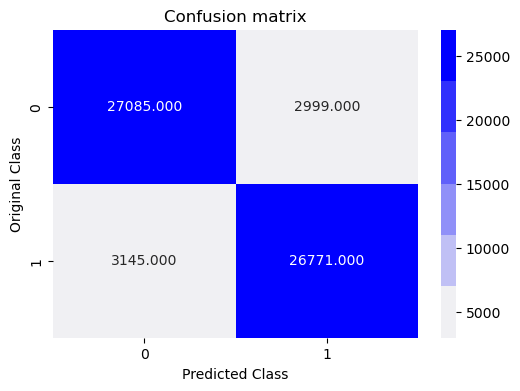

In [21]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

In [32]:
td = pd.read_csv('test_data_m.csv')
td

,Id,from,to,Indegree,Outdegree,Jaccard_Coefficient
0,1,3360982,4457271,102,1969,0.036222
1,2,4761876,4698439,68,130,0.000000
2,3,4198430,3615486,217,7002,0.000000
3,4,2945770,747948,210,293,0.004264
4,5,3950088,3360335,149,1315,0.021918
...,...,...,...,...,...,...
1995,1996,3116985,2415415,105,454,0.014035
1996,1997,265459,842701,95,3949,0.003521
1997,1998,2547139,4332939,48,135,0.034247
1998,1999,2366264,1815056,10,115,0.008850


In [34]:
td = td.drop("Id",axis=1)

In [35]:
y_test_pred = clf.predict(td)
y_test_pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [36]:
arr = np.array(y_test_pred)

In [37]:
zero_count = np.count_nonzero(arr == 0)
print(zero_count)

842


In [38]:
td['Predictions'] = arr
td

,from,to,Indegree,Outdegree,Jaccard_Coefficient,Predictions
0,3360982,4457271,102,1969,0.036222,1
1,4761876,4698439,68,130,0.000000,0
2,4198430,3615486,217,7002,0.000000,1
3,2945770,747948,210,293,0.004264,1
4,3950088,3360335,149,1315,0.021918,1
...,...,...,...,...,...,...
1995,3116985,2415415,105,454,0.014035,1
1996,265459,842701,95,3949,0.003521,1
1997,2547139,4332939,48,135,0.034247,1
1998,2366264,1815056,10,115,0.008850,1


In [39]:
td['Id'] = range(1, 2001)

In [40]:
td

,from,to,Indegree,Outdegree,Jaccard_Coefficient,Predictions,Id
0,3360982,4457271,102,1969,0.036222,1,1
1,4761876,4698439,68,130,0.000000,0,2
2,4198430,3615486,217,7002,0.000000,1,3
3,2945770,747948,210,293,0.004264,1,4
4,3950088,3360335,149,1315,0.021918,1,5
...,...,...,...,...,...,...,...
1995,3116985,2415415,105,454,0.014035,1,1996
1996,265459,842701,95,3949,0.003521,1,1997
1997,2547139,4332939,48,135,0.034247,1,1998
1998,2366264,1815056,10,115,0.008850,1,1999


In [41]:
X = td[['Id', 'Predictions']]
X

,Id,Predictions
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1
...,...,...
1995,1996,1
1996,1997,1
1997,1998,1
1998,1999,1


In [42]:
csv_file_path = 'ans_1.csv'
X.to_csv(csv_file_path, index=False)